### Análisis exploratorio del dataset de YELP con dataset completo.
### En el análisis con la muestra de 15 mil registros, sólo se detectaron datos en tres (3) ciudades. Verificaremos qué sucede con el dataset completo.

In [1]:
#Importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import geopandas as gpd
from wordcloud import WordCloud 
import json 
import math

In [5]:
# Leemos archivo business.pkl 
business = pd.read_pickle('/Users/pabloclementi/Desktop/ProyectoFinal/Yelp/business.pkl')

In [6]:
# Convertimos archivo business a dataframe 
df_business = pd.DataFrame(business)

In [7]:
#Obtenemos columnas de interes 
df_business.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'business_id', 'name', 'address',
       'city', 'state', 'postal_code', 'latitude', 'longitude', 'stars',
       'review_count', 'is_open', 'attributes', 'categories', 'hours'],
      dtype='object')

In [8]:
df_business= df_business.loc[:, ~df_business.columns.duplicated()]

df_business = df_business.dropna(axis=1, how='all')

df_business.shape

(150346, 14)

In [9]:
df_business

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,NaN,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,3388 Gateway Blvd,Edmonton,IN,T6J 5H2,53.468419,-113.492054,3.0,13,1,"{'ByAppointmentOnly': 'False', 'RestaurantsPri...","Nail Salons, Beauty & Spas","{'Monday': '10:0-19:30', 'Tuesday': '10:0-19:3..."
150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,2813 Bransford Ave,Nashville,DE,37204,36.115118,-86.766925,4.0,5,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Pets, Nurseries & Gardening, Pet Stores, Hobby...","{'Monday': '9:30-17:30', 'Tuesday': '9:30-17:3..."
150343,_QAMST-NrQobXduilWEqSw,Claire's Boutique,"6020 E 82nd St, Ste 46",Indianapolis,AB,46250,39.908707,-86.065088,3.5,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Shopping, Jewelry, Piercing, Toy Stores, Beaut...",None
150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,AB,62025,38.782351,-89.950558,4.0,24,1,"{'BusinessParking': '{'garage': False, 'street...","Fitness/Exercise Equipment, Eyewear & Optician...","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ..."


In [6]:
# # Pasamos la columna city toda a minuscula 
# df_business['city'] = df_business['city'].str.title()

In [7]:
stadium_city = [
    "Charlotte", "Atlanta", "Seattle", "South Bronx", "Nashville",
    "Carson", "Cincinnati", "Portland Harrison", "Chicago", "St. Louis",
    "Vancouver", "Houston", "Los Angeles", "Fort Lauderdale", "Kansas City",
    "Austin", "Frisco", "Sandy", "Columbus", "Foxborough",
    "Washington", "Saint Paul", "Chester", "Commerce City", "San Jose"
]

In [8]:
stadium_states = [
    "North Carolina", "Georgia", "Washington", "New York", "Tennessee",
    "California", "Ohio", "New Jersey", "Illinois", "Missouri",
    "British Columbia", "Texas", "California", "Florida", "Kansas",
    "Texas", "Texas", "Utah", "Ohio", "Massachusetts",
    "D.C.", "Minnesota", "Pennsylvania", "Colorado", "California"
]

In [9]:
# #Filtramos dataframe por stadium_city en city 
# df_stadium_city = df_business[df_business['city'].isin(stadium_city)]

In [10]:
df_stadium_city

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,MO,37207,36.208102,-86.76817,1.5,10,1,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '..."
24,4iRzR7OaS-QaSXuvYxEGKA,Super Dog,1160 Gallatin Pike S,Nashville,IN,37115,36.24857,-86.719986,4.0,6,0,"{'RestaurantsReservations': 'False', 'Restaura...","Hot Dogs, Restaurants",None
27,tMkwHmWFUEXrC9ZduonpTg,The Green Pheasant,215 1st Ave S,Nashville,TN,37201,36.159886,-86.773197,4.0,161,0,"{'RestaurantsGoodForGroups': 'True', 'HappyHou...","Restaurants, Japanese, Seafood","{'Wednesday': '16:0-22:0', 'Thursday': '16:0-2..."
47,lk9IwjZXqUMqqOhM774DtQ,Caviar & Bananas,2031 Broadway,Nashville,PA,37203,36.148371,-86.798895,3.5,159,0,"{'RestaurantsTakeOut': 'True', 'RestaurantsRes...","Coffee & Tea, Restaurants, Wine Bars, Bars, Ni...","{'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ..."
71,B2qqjCl_BNNnXvWWfpFiLA,Pottery Barn Kids,"4011 Hillsboro Pike, Ste 102",Nashville,IN,37215,36.103614,-86.816268,1.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Shopping, Baby Gear & Furniture, Home Decor, F...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-20:0', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150268,Jv7_p4V9KG7Ar_GEXDenng,Boutique Bella,"2817 W End Ave, Ste 111",Nashville,TN,37203,36.144157,-86.812599,3.5,10,0,"{'BusinessAcceptsCreditCards': 'True', 'Busine...","Jewelry, Shopping, Fashion, Women's Clothing, ...","{'Monday': '10:0-18:0', 'Tuesday': '10:0-18:0'..."
150277,n6W7Dtz5Xz4glh2bkEFX1Q,San Luis Taqueria,"1501 Lebanon Pike, Ste 2",Nashville,TN,37210,36.153582,-86.721293,4.0,6,1,"{'Alcohol': 'u'none'', 'WiFi': 'u'free'', 'Res...","Restaurants, Mexican","{'Monday': '7:0-21:0', 'Tuesday': '7:0-21:0', ..."
150315,WXNag-tmudrFHFlfNLogWg,Whole Foods Market,4577 W Pine Blvd,St. Louis,ID,63108,38.641988,-90.261655,4.0,71,1,"{'RestaurantsPriceRange2': '3', 'DogsAllowed':...","Health Markets, Specialty Food, Food, Grocery","{'Monday': '0:0-0:0', 'Tuesday': '7:0-22:0', '..."
150322,2MAQeAqmD8enCT2ZYqUgIQ,The Melting Pot - Nashville,"166 2nd Ave N, Ste A",Nashville,PA,37201,36.163875,-86.776311,4.0,204,0,"{'RestaurantsDelivery': 'False', 'RestaurantsR...","Fondue, Beer, Wine & Spirits, Food, Restaurants","{'Monday': '0:0-0:0', 'Tuesday': '16:0-21:0', ..."


In [11]:
df_stadium_state = df_business[df_business['city'].isin(stadium_states)]

In [6]:
df_business.to_csv('/Users/pabloclementi/Desktop/ProyectoFinal/Yelp/business.csv')

In [8]:

def registros_en_radio_multiple(registros, puntos_referencia, distancia_km=10):
    

    registros_filtrados = pd.DataFrame()
    for latitud_inicial, longitud_inicial in puntos_referencia:
        # Cálculo de los límites y filtrado, como en la función original
        desplazamiento_latitud = distancia_km / 111
        latitud_minima = latitud_inicial - desplazamiento_latitud
        latitud_maxima = latitud_inicial + desplazamiento_latitud
    
        # Aproximadamente 111 km por grado de longitud, ajustado por la latitud
        desplazamiento_longitud = distancia_km / (111 * math.cos(math.radians(latitud_inicial)))
        longitud_minima = longitud_inicial - desplazamiento_longitud
        longitud_maxima = longitud_inicial + desplazamiento_longitud

        registros_filtrados_temp = registros[
            (registros['latitude'] >= latitud_minima) & (registros['latitude'] <= latitud_maxima) &
            (registros['longitude'] >= longitud_minima) & (registros['longitude'] <= longitud_maxima)
        ]
        registros_filtrados = pd.concat([registros_filtrados, registros_filtrados_temp], ignore_index=True)

    # Eliminar duplicados si es necesario
    registros_filtrados = registros_filtrados.drop_duplicates()

    return registros_filtrados

In [11]:
puntos_referencia = [(33.7575, -84.3963), (35.2258, -80.8462), (41.8623, -87.6167), (39.1030, -84.5164), (39.9636, -82.9988), (38.8737, -77.0020),          
                      (26.0820, -80.2526), (36.1456, -86.7998), (42.0909, -71.2600), (40.8296, -73.9262), (40.7429, -74.1745), (28.5428, -81.3792), 
                      (39.8473, -75.3613), (30.2970, -97.7085), (39.8056, -104.8771), (33.1531, -96.8208), (29.7464, -95.3600), (34.0164, -118.2814), 
                      (33.8654, -118.2201), (44.9790, -93.2260), (45.5215, -122.6768), (40.5601, -111.8888), (37.3323, -121.9050), (47.5951, -122.3316), 
                      (39.0972, -94.8410), (38.6136, -90.2084),                       
]



In [2]:

def registros_en_radio_multiple(registros, puntos_referencia, distancia_km=10):
    registros_filtrados = pd.DataFrame()
    
    for latitud_inicial, longitud_inicial in puntos_referencia:
        # Cálculo de los límites y filtrado, como en la función original
        desplazamiento_latitud = distancia_km / 111
        latitud_minima = latitud_inicial - desplazamiento_latitud
        latitud_maxima = latitud_inicial + desplazamiento_latitud
    
        # Aproximadamente 111 km por grado de longitud, ajustado por la latitud
        desplazamiento_longitud = distancia_km / (111 * math.cos(math.radians(latitud_inicial)))
        longitud_minima = longitud_inicial - desplazamiento_longitud
        longitud_maxima = longitud_inicial + desplazamiento_longitud

        registros_filtrados_temp = registros[
            (registros['latitude'] >= latitud_minima) & (registros['latitude'] <= latitud_maxima) &
            (registros['longitude'] >= longitud_minima) & (registros['longitude'] <= longitud_maxima)
        ]
        registros_filtrados = pd.concat([registros_filtrados, registros_filtrados_temp], ignore_index=True)

    # Convertir columnas con diccionarios en cadenas para hacerlas hashables
    for col in registros_filtrados.columns:
        if registros_filtrados[col].apply(lambda x: isinstance(x, dict)).any():
            registros_filtrados[col] = registros_filtrados[col].apply(lambda x: str(x) if isinstance(x, dict) else x)
    
    # Eliminar duplicados si es necesario
    registros_filtrados = registros_filtrados.drop_duplicates()

    return registros_filtrados

In [12]:
registros_cercanos = registros_en_radio_multiple(df_business, puntos_referencia, distancia_km=10)

print(registros_cercanos)

                  business_id                 name  \
0      bBDDEgkFA1Otx9Lfe7BZUQ       Sonic Drive-In   
1      tMkwHmWFUEXrC9ZduonpTg   The Green Pheasant   
2      lk9IwjZXqUMqqOhM774DtQ     Caviar & Bananas   
3      B2qqjCl_BNNnXvWWfpFiLA    Pottery Barn Kids   
4      oaboaRBUgGjbo2kfUIKDLQ     Mike's Ice Cream   
...                       ...                  ...   
11721  ANTj0UD-OS7Zod3mulUg6w          Fork & Stix   
11722  Tsf0CSHMhcajQOJe-GYQyg  Qdoba Mexican Grill   
11723  Ld3qgGua7MqrFnZY8AIo0A         Café Ventana   
11724  7xc84taj12pt-RtZhAfSkQ   Pimped Out Pickles   
11725  WXNag-tmudrFHFlfNLogWg   Whole Foods Market   

                            address         city state postal_code   latitude  \
0               2312 Dickerson Pike    Nashville    MO       37207  36.208102   
1                     215 1st Ave S    Nashville    TN       37201  36.159886   
2                     2031 Broadway    Nashville    PA       37203  36.148371   
3      4011 Hillsboro Pike,

In [14]:
registros_cercanos['city'].unique()

array(['Nashville', 'NASHVILLE', 'Goodlettsville', 'Antioch',
       'Nashville-Davidson metropolitan government (balance)',
       'Brentwood', 'East Nashville', 'Berry Hill', 'Inglewood',
       'Nashville,', 'Madison', 'Springfield', 'Belle Meade',
       'Nashville ', 'Hendersonville', 'Mount Juliet', 'Nolensville',
       'Green Hills', 'Lebanon', 'Nsshville', 'West Nashville',
       'Glenolden', 'Brookhaven', 'Aston', 'Delaware County', 'Chester',
       'Media', 'Primos', 'Collingdale', 'Prospect Park', 'Folsom',
       'Clifton Heights', 'Ridley Park', 'Woodlyn', 'Boothwyn', 'Darby',
       'Sharon Hill', 'Swedesboro', 'Eddystone', 'Swarthmore', 'Morton',
       'Holmes', 'Claymont', 'Essington', 'Secane', 'Mickleton',
       'Crum Lynne', 'Philadelphia', 'Secane ', 'Paulsboro',
       'Primos-Secane', 'Wallingford', 'Lester', 'Folcroft', 'Linwood',
       'Garnet Valley', 'Wilmington', 'Logan Township', 'Milmont Park',
       'Marcus Hook', 'Trainer', 'Tinicum', 'Aldan', 'Nor

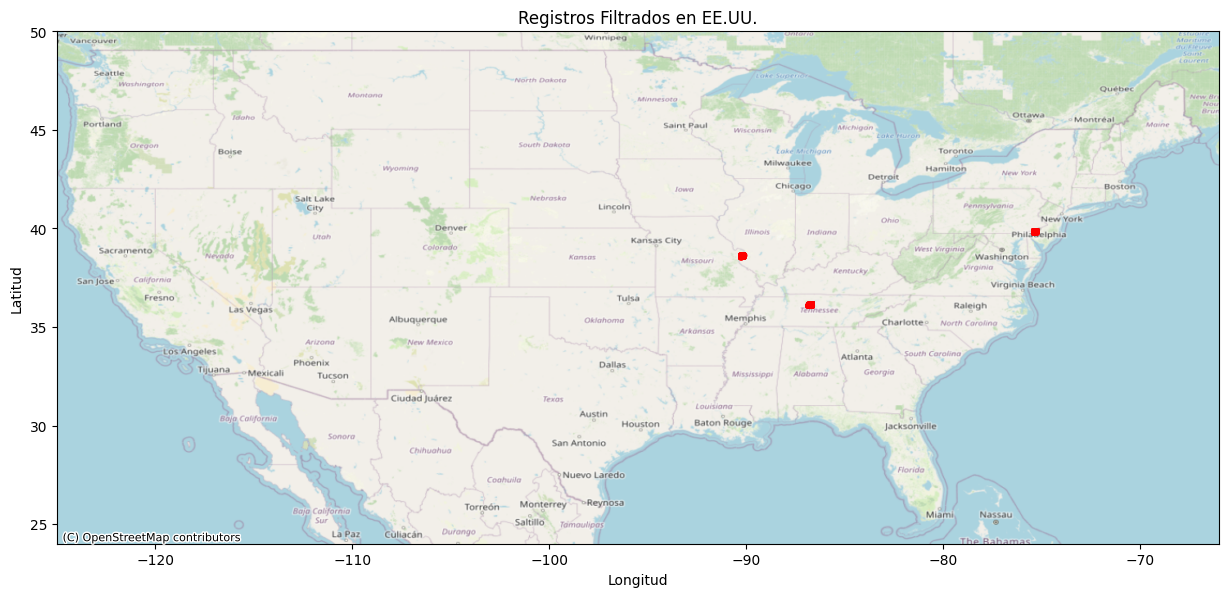

In [25]:
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
from shapely.geometry import Point

# Suponiendo que registros_cercanos es un DataFrame con columnas 'longitude' y 'latitude'
geo_stadium = gpd.points_from_xy(registros_cercanos['longitude'], registros_cercanos['latitude'])
gdf_stadium = gpd.GeoDataFrame(registros_cercanos, geometry=geo_stadium)

# Definir CRS (sistema de coordenadas)
gdf_stadium.set_crs(epsg=4326, inplace=True)

# Configuración del gráfico
fig, ax = plt.subplots(figsize=(15, 15))

# Graficar los puntos
gdf_stadium.plot(ax=ax, marker='o', color='red', markersize=5, alpha=0.7)

# Ajustar la vista al área de EE.UU.
ax.set_xlim([-125, -66])
ax.set_ylim([24, 50])

# Añadir el fondo del mapa satelital
# ctx.add_basemap(ax, crs=gdf_stadium.crs.to_string(), source=ctx.providers.Esri.WorldImagery, zoom=4)
ctx.add_basemap(ax, crs=gdf_stadium.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik,zoom= 5)

# Títulos y etiquetas
ax.set_title('Registros Filtrados en EE.UU.')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

plt.show()

#### Se verifica que los resultados obtenidos con el dataset completo, también arroja sólo datos de sólo tres (3) zonas enrededor de los estadios. 
#### Confirmamos la prescindencia de este Dataset para continuar con el proyecto.

In [50]:
palabras_clave = [
    'restaurant', 'coffee', 'beer', 'food', 'wine', 'taco', 'burger', 
    'pizza', 'sushi', 'bistro', 'cafe', 'diner', 'pub', 
    'bakery', 'brewery', 'grill', 'steakhouse', 'buffet', 'canteen',
    'brunch', 'cuisine', 'dessert', 'eatery', 'fast food', 'gastropub',
    'dinner', 'breakfast', 'lunch', 'sandwich', 'pasta', 'noodle', 
    'ice cream', 'smoothie', 'juice', 'food truck', 'food court', 'veggie','vegetarian', 'vegan', 'plant-based', 'veggie', 'tofu', 
    'tempeh', 'seitan', 'quinoa', 'lentils', 'beans', 
    'salad', 'greens', 'smoothie bowl', 'raw food', 'non-dairy', 
    'meatless', 'vegetables', 'fruit', 'herbivore', 'nutritional yeast'
]





In [51]:
registros_cercanos.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'es_gastronomico'],
      dtype='object')